In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

/Users/hankiho/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


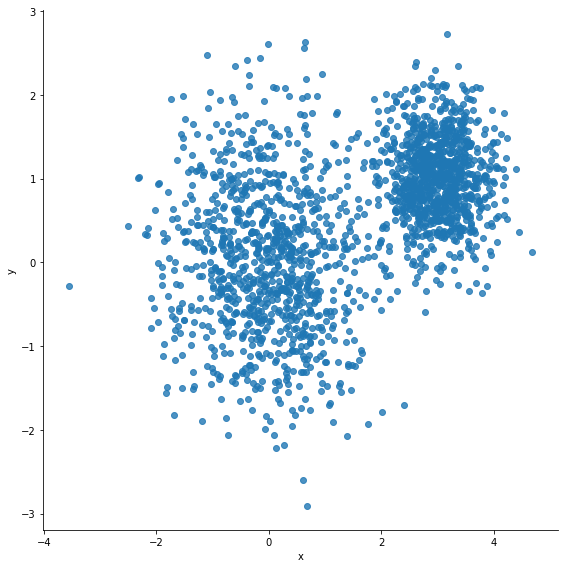

In [4]:
#랜덤 좌표 생성
num_points = 2000 
vectors_set = [] 
for i in range(num_points) : 
    if np.random.random() > 0.5: 
        vectors_set.append([np.random.normal(0.0 , 0.9), np.random.normal(0.0, 0.9)]) 
    else: 
        vectors_set.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)]) 
df = pd.DataFrame({"x" : [v[0] for v in vectors_set], "y" : [v[1] for v in vectors_set]}) 
sns.lmplot("x", "y" , data = df, fit_reg = False, size = 8) 
plt.show()

In [5]:
import tensorflow as tf

In [6]:
vectors = tf.constant(vectors_set) # 모든 데이터를 상수 텐서로 옮김
k = 7 # 초기 단계 : 중심 k(n)개를 입력데이터에서 무작위로 선택
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))
# vector.get_shape(), centroides.get_shape()
# 위 주석으로 각 텐서의 구조를 확인해볼 수 있음  
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

# 할당 단계 : 유클리드 제곱거리 사용
diff = tf.subtract(expanded_vectors, expanded_centroides)
sqr = tf.square(diff)
distances = tf.reduce_sum(sqr, 2)
assignments = tf.argmin(distances,0)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# 업데이트 : 새로운 중심 계산
means = tf.concat([tf.reduce_mean(
                      tf.gather(vectors,
                                tf.reshape(
                                    tf.where(tf.equal(assignments, c))
                                    ,[1, -1])
                                )
                      , reduction_indices=[1]) for c in range(k)],0)
update_centroides = tf.assign(centroides, means)
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

In [ ]:
for step in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])
data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg = False, size = 8, hue="cluster", legend=False)
plt.show()